# Deep Multi-Layer Perceptron trained on MNIST dataset

In [125]:
import tensorflow as tf
import numpy as np

### Construction phase

In [126]:
n_inputs = 28*28
n_hidden1 = 150
n_hidden2 = 150
n_outputs = 10

In [127]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int64, shape=(None), name='y')

In [128]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name='Kernel')
        b = tf.Variable(tf.zeros([n_neurons]), name='bias')
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [129]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name='outputs')

In [130]:
# Activation function of the output layer: Softmax function and then Cross Entropy
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [131]:
learning_rate = 1e-2

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [132]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [133]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

### Execution Phase

In [134]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [135]:
n_epochs = 40
batch_size = 50
n_batch = mnist.train.num_examples // batch_size # "//" means divide and cast to int

In [136]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(n_batch):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    save_path = saver.save(sess, "./my_model.ckpt")

0 Train accuracy: 0.92 Test accuracy: 0.9073
1 Train accuracy: 0.96 Test accuracy: 0.9271
2 Train accuracy: 0.92 Test accuracy: 0.9372
3 Train accuracy: 0.96 Test accuracy: 0.9438
4 Train accuracy: 0.92 Test accuracy: 0.9491
5 Train accuracy: 0.92 Test accuracy: 0.9509
6 Train accuracy: 0.96 Test accuracy: 0.9538
7 Train accuracy: 1.0 Test accuracy: 0.9579
8 Train accuracy: 0.98 Test accuracy: 0.9589
9 Train accuracy: 0.96 Test accuracy: 0.9622
10 Train accuracy: 0.98 Test accuracy: 0.9637
11 Train accuracy: 0.98 Test accuracy: 0.9638
12 Train accuracy: 0.98 Test accuracy: 0.966
13 Train accuracy: 0.98 Test accuracy: 0.9662
14 Train accuracy: 0.98 Test accuracy: 0.9671
15 Train accuracy: 0.98 Test accuracy: 0.9673
16 Train accuracy: 1.0 Test accuracy: 0.9695
17 Train accuracy: 0.98 Test accuracy: 0.9692
18 Train accuracy: 0.98 Test accuracy: 0.9709
19 Train accuracy: 1.0 Test accuracy: 0.9711
20 Train accuracy: 1.0 Test accuracy: 0.972
21 Train accuracy: 0.98 Test accuracy: 0.972
22 Tr

### Test on digits manually designed

In [137]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [138]:
digits = []
digits_value = []

digits.append(Image.open('DATA/DIGITS/zero.jpg'))
digits.append(Image.open('DATA/DIGITS/one.jpg'))
digits.append(Image.open('DATA/DIGITS/two.jpg'))
digits.append(Image.open('DATA/DIGITS/three.jpg'))
digits.append(Image.open('DATA/DIGITS/four.jpg'))
digits.append(Image.open('DATA/DIGITS/five.jpg'))
digits.append(Image.open('DATA/DIGITS/six.jpg'))
digits.append(Image.open('DATA/DIGITS/seven.jpg'))
digits.append(Image.open('DATA/DIGITS/eight.jpg'))
digits.append(Image.open('DATA/DIGITS/nine.jpg'))

for i in range(10):
    digits_value.append(np.asarray(digits[i]))

In [139]:
digit_test = np.zeros((10, 1, 784))
mark, count = 0, 0

for f in range(10):
    for i in range(28):
        for j in range(28):
            for k in range(3):
                mark += digits_value[f][i][j][k]
            digit_test[f][0][count] = 1 - mark / 768
            mark = 0
            count += 1
    count = 0

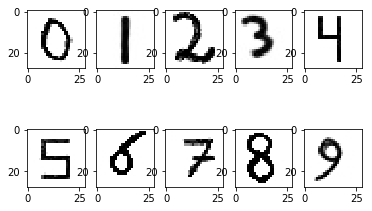

In [140]:
_, grid_show = plt.subplots(2,5)
count = 0

for i in range(2):
    for j in range(5):
        grid_show[i][j].imshow(digit_test[count].reshape(28,28), cmap='Greys')
        count += 1

In [141]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model.ckpt")
    X_new_scaled = digit_test.reshape(10, 784)
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)
    print(y_pred)

INFO:tensorflow:Restoring parameters from ./my_model.ckpt
[0 1 2 3 4 5 6 7 8 9]
